# Project 2

In this project, you will implement the exploratory analysis plan developed in Project 1. This will lay the groundwork for our our first modeling exercise in Project 3.

## Comments

Q1 -> Good
Q2 -> Good
Q3 -> Good
Q4 -> Good
Q5 -> Good
Q6 -> Good
Q7 -> Good
Q8 -> df.hist() is a useful command to get quick distribution plots of all the columns
Q9 & Q10 -> We do meet the normal distribution requirement even though GPA and GRE are skewed toward the upper ranges.
no need to correct for slight skew. Though slightly skewed, in this setting there is no need to correct anything. 
Q11 -> Good
Q12 -> Good
Q13 -> Good
Q14 -> Good

### Step 1: Load the python libraries you will need for this project 

In [4]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import numpy as np
%matplotlib inline

### Step 2: Read in your data set 

In [39]:
#Read in data from source 
df_raw = pd.read_csv("../assets/admissions.csv")
print df_raw.head()

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


## Questions
#### Question 1. How many observations are in our dataset? 


In [40]:
df_raw.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

Answer: There are 400 rows (observations), but not all of them are complete for every entry

#### Question 2. Create a summary table

In [41]:
df_raw.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


#### Question 3. Why would GRE have a larger STD than GPA?

Answer: The STD is larger mostly because the range of potential GRE scores (220-800) spans much more (and therefore allows for much more deviation) than GPA, which ranges only from 2.26 to 4 

#### Question 4. Drop data points with missing data


In [49]:
df_dropped=df_raw.dropna()

In [51]:
df_dropped.describe()

,admit,gre,gpa,prestige
count,397.000000,397.000000,397.000000,397.000000
mean,0.317380,587.858942,3.392242,2.488665
std,0.466044,115.717787,0.380208,0.947083
min,0.000000,220.000000,2.260000,1.000000
25%,0.000000,520.000000,3.130000,2.000000
50%,0.000000,580.000000,3.400000,2.000000
75%,1.000000,660.000000,3.670000,3.000000
max,1.000000,800.000000,4.000000,4.000000


In [52]:
df_dropped.count()

admit       397
gre         397
gpa         397
prestige    397
dtype: int64

#### Question 5. Confirm that you dropped the correct data. How can you tell? 

Answer: There are now the same number of observations for all 4 variables, implying that the right data were dropped since all had different amounts of observations before

#### Question 6. Create box plots for GRE and GPA

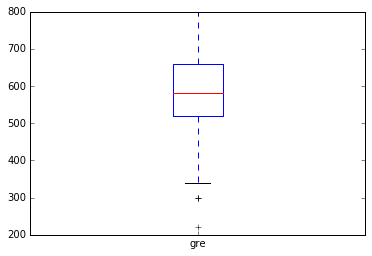

In [68]:
df_dropped['gre'].plot(kind="box")

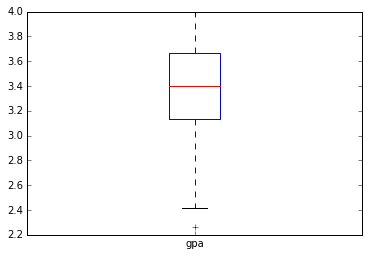

In [70]:
df_dropped['gpa'].plot(kind="box")

#### Question 7. What do this plots show?

Answer:  THese plots show the min, max, 25th percentile, 75th percentile, and median of GRE and GPA scores for applicants; red line is median, solid blue lines are 25th/75th percentiles, the max is at the top, and the solid dark line is the min

#### Question 8. Describe each distribution 

In [74]:
import seaborn as sns

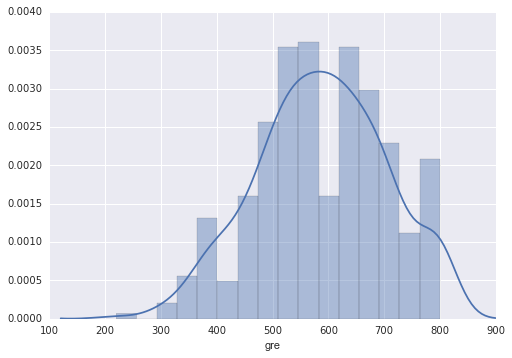

In [81]:
sns.distplot(df_dropped['gre'])

This distribution is not exactly normal, but does generally increase towards a median and decrease at the lower extreme, with a smaller dropoff at the upper extreme 

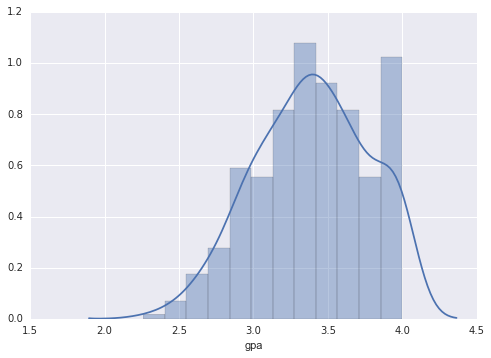

In [82]:
sns.distplot(df_dropped['gpa'])

This distribution is also not entirely normal, but rather the density seems to stay the same or increase as GPA increases

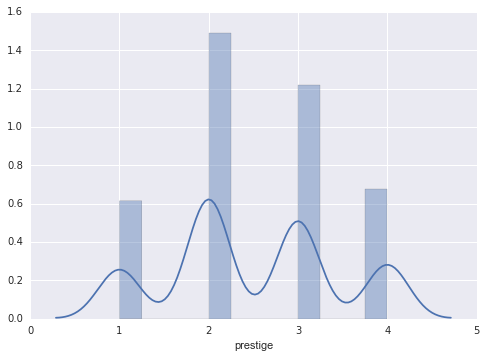

In [83]:
sns.distplot(df_dropped['prestige'])

Since this is a categorical variable, the distribution doesn't reveal much- 1 and 4 are less frequent than 2 and 4, but it's difficult to read too much into this absent other data

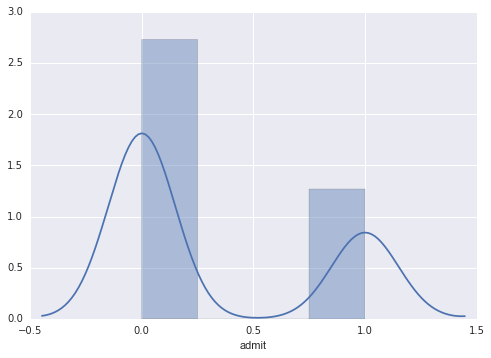

In [84]:
sns.distplot(df_dropped['admit'])

This distribution is of a binary outcome variable- all it shows is that less students were admitted than not admitted

#### Question 9.  If our model had an assumption of a normal distribution would we meet that requirement? 

Answer: No- the independent variables aren't normally distributed 

#### Question 10.  Does this distribution need correction? If so, why? How? 

Answer: Yes- in order to truly derive value from statistical analyses (e.g. regressions) meant for datasets with normal distributions, the dataset has to be normalized; this could be done through various methods, such as creating standardized scores or logarithmic transofrmation; alternately, the data could be analyzed using statistical analyses that don't require normal distributions, or analyses should be caveated that the underlying data isn't normally distributed

#### Question 11. Which of our variables are potentially colinear? 

In [86]:
# create a correlation matrix for the data
df_dropped.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.181202,0.174116,-0.243563
gre,0.181202,1.000000,0.382408,-0.124533
gpa,0.174116,0.382408,1.000000,-0.060976
prestige,-0.243563,-0.124533,-0.060976,1.000000


GRE and GPA are potentially collinear, and gpa/prestige and gre/prestige are potentially collinear (but inversely related)

#### Question 12. What did you find?

Answer: GRE and GPA likely appear partially collinear; prestige seems to have appears to be slightly negatively correlated with  gre and gpa; however, collinearity in all of these is likely fairly low, since the values are all below 0.4; the collinearity between gre and gpa is highest at .38

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of  undergraduate schools.

Answer: 
Create a multi-variate regression between admissions rates as IV and prestige, GPA, and GRE as DVs (to test for all of them) to derive the effect of prestige on likelihood of admission

#### Question 14. What is your hypothesis? 

Answer: When GPA and GRE are controlled for, prestige has a slight negative effect on the likelihood of admission

## Bonus/Advanced

#### 1. Bonus: Explore alternatives to dropping obervations with missing data

#### 2. Bonus: Log transform the skewed data

#### 3. Advanced: Impute missing data